# 02. 使用 Scikit-Learn 機器學習套件進行分類

## 目錄

- 使用 Scikit Learn
- 在 Scikit-Learn 中訓練感知器
- 繪製決策邊界
- 透過邏輯迴歸模型來取的類別機率
- 支持向量機 (Support Vector Machines)

# 使用 Scikit Learn

## 匯入套件庫

In [1]:
# 匯入 Sklearn 套件的資料集
from sklearn import datasets
# 匯入 numpy 套件
import numpy as np

## 載入 Sklearn 提供的 Iris 鳶尾花資料集

In [2]:
# 使用 Sklearn 載入資料集
iris = datasets.load_iris()
iris_data = iris.data[:, [2, 3]]
iris_label = iris.target

# 顯示資料數量與類別標籤
print('資料數量:', len(iris_data))
print('類別標籤:', np.unique(iris_label))

資料數量: 150
類別標籤: [0 1 2]


## 拆分資料集
依照 70% training 與 30% test 比例進行拆分

In [3]:
# 從 sklearn.model_selection 匯入 train_test_split 進行資料拆分
from sklearn.model_selection import train_test_split

# 拆分資料為 7:3
x_train, x_test, y_train, y_test = train_test_split(
    iris_data, iris_label,
    test_size=0.3,
    random_state=1,
    stratify=iris_label  # 依照比例拆分
)

In [4]:
# 顯示總測試資料數量，與拆分 7:3 後的數量
print('Labels count in y:', np.bincount(iris_label))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


## 特徵值標準化

In [5]:
# 從 sklearn 的預處理中匯入 StandardScaler 來標準化特徵值
from sklearn.preprocessing import StandardScaler

# 對資料進行特徵縮放
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [6]:
# 標準化後的結果
x_test_std

array([[ 0.89820289,  1.44587881],
       [-1.16537974, -1.04507821],
       [-1.33269725, -1.17618121],
       [ 0.39625036,  0.65926081],
       [ 0.34047786,  0.2659518 ],
       [ 0.11738784,  0.1348488 ],
       [ 1.12129291,  0.79036381],
       [ 0.39625036,  0.3970548 ],
       [ 0.84243039,  0.92146681],
       [-1.38846976, -1.04507821],
       [-1.27692475, -1.04507821],
       [ 0.61934037,  0.79036381],
       [-1.33269725, -1.30728421],
       [-0.27301968, -0.2584602 ],
       [-1.33269725, -1.30728421],
       [ 0.56356787,  0.2659518 ],
       [ 0.73088538,  1.44587881],
       [ 0.39625036,  0.3970548 ],
       [ 0.28470535,  0.1348488 ],
       [ 0.78665788,  1.05256981],
       [ 1.17706541,  1.18367281],
       [-1.33269725, -1.43838721],
       [ 0.34047786,  0.2659518 ],
       [ 0.61934037,  1.05256981],
       [ 0.22893285,  0.1348488 ],
       [ 0.50779537,  0.5281578 ],
       [-0.4403372 , -0.1273572 ],
       [ 1.0655204 ,  1.70808482],
       [-1.22115225,

# 在 Scikit-Learn 中訓練感知器

## 模型擬合

In [7]:
# 從 sklearn 的線性模型中匯入感知器
from sklearn.linear_model import Perceptron

# 創建感知器模型
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(x_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

## 模型預測

In [8]:
# 預測
y_pred = ppn.predict(x_test_std)

# 顯示分類錯誤的樣本數
print(f'分類錯誤的樣本數: {(y_test != y_pred).sum()}')

分類錯誤的樣本數: 1


## 模型預測評估

### 使用 sklearn 提供的評估方法

In [9]:
# 從 sklearn 的估計中，匯入準確率來進行評估
from sklearn.metrics import accuracy_score

# 顯示準確率
print(f'準確率： {accuracy_score(y_test, y_pred)}')

準確率： 0.9777777777777777


### 使用模型內部的評估方法

In [10]:
# 顯示準確率
print(f'準確率： {ppn.score(x_test_std, y_test)}')

準確率： 0.9777777777777777


# 繪製決策邊界

## 加入中文字體

In [11]:
# 新增中文字型
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont("./resources/NotoSansTC.ttf")
mlp.rc('font', family='Noto Sans TC')

## 實作繪製決策邊界

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(x, y, classifier, test_idx=None, resolution=0.02):
    # 設定標記與顏色
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 繪製決策平面
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0],
                    y=x[y == cl, 1],
                    alpha=0.8,
                    color=colors[idx],
                    marker=markers[idx],
                    label=cl)

    # 圈出測試樣本
    if test_idx:
        # 繪製所有測試樣本
        _x_test, _y_test = x[test_idx, :], y[test_idx]
        plt.scatter(_x_test[:, 0],
                    _x_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

## 繪製決策邊界

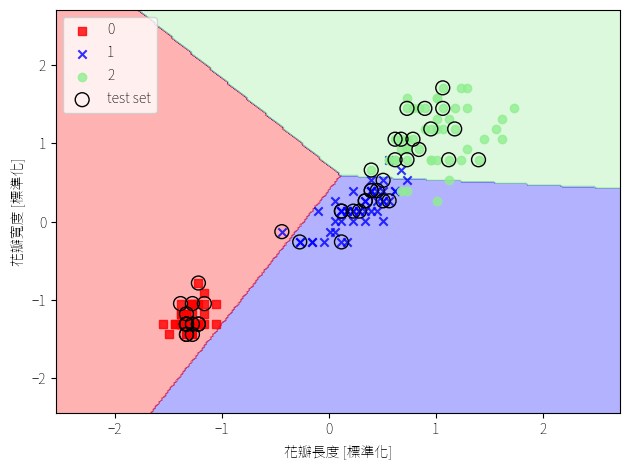

In [13]:
# 合併所有樣本
x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))

# 繪製決策邊界
plot_decision_regions(
    x=x_combined_std, y=y_combined,
    classifier=ppn,
    test_idx=range(105, 150)
)
plt.xlabel('花瓣長度 [標準化]')
plt.ylabel('花瓣寬度 [標準化]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# 透過邏輯迴歸模型來取的類別機率

## S型函數 (Sigmoid)

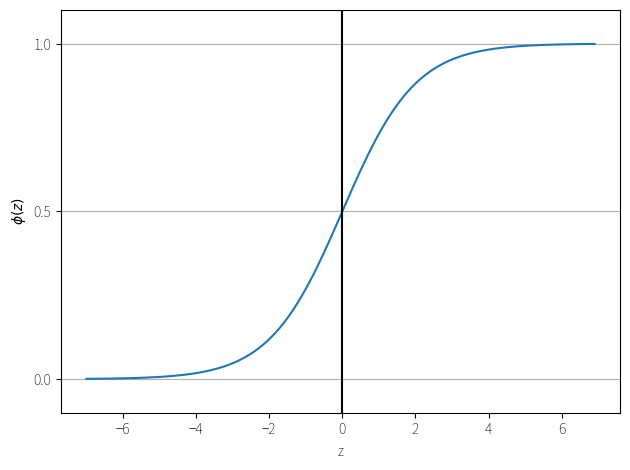

In [14]:
import matplotlib.pyplot as plt
import numpy as np


# Sigmoid 函數
def sigmoid(_z):
    return 1.0 / (1.0 + np.exp(-_z))


z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

## 實作邏輯回歸梯度下降模型

In [15]:
# 實作邏輯回歸梯度下降模型
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1, hook=None):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self._weights = np.asarray([])
        self.cost = []
        self._hook = hook

    # 擬合模型
    def fit(self, x, y):
        rgen = np.random.RandomState(self.random_state)
        self._weights = rgen.normal(loc=0.0, scale=0.01, size=1 + x.shape[1])
        self.cost = []

        for i in range(self.n_iter):
            net_input = self.net_input(x)
            output = self.activation(net_input)
            errors = (y - output)
            self._weights[1:] += self.eta * x.T.dot(errors)
            self._weights[0] += self.eta * errors.sum()

            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost.append(cost)

        return self

    # 計算網路輸入
    def net_input(self, _x):
        """Calculate net input"""
        return np.dot(_x, self._weights[1:]) + self._weights[0]

    # 活化函數
    def activation(self, _z):
        return 1. / (1. + np.exp(-np.clip(_z, -250, 250)))

    # 預測
    def predict(self, _x):
        return np.where(self.activation(self.net_input(_x)) >= 0.5, 1, 0)

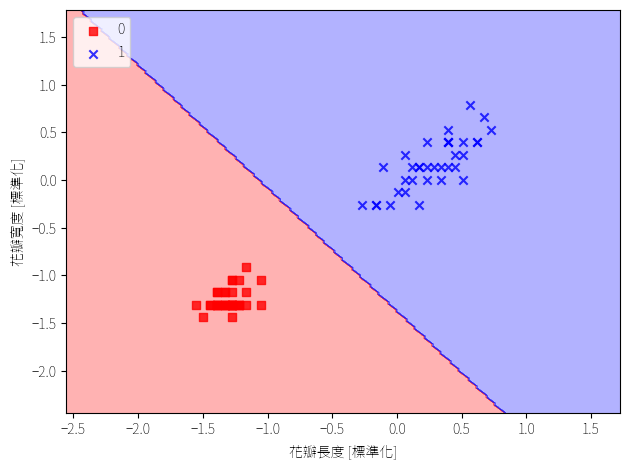

In [16]:
# 只取出資料集中的兩個類別
x_train_01_subset = x_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

# 使用邏輯回歸模型進行擬合
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(x_train_01_subset,
         y_train_01_subset)

# 繪製決策邊界
plot_decision_regions(
    x=x_train_01_subset,
    y=y_train_01_subset,
    classifier=lrgd
)

plt.xlabel('花瓣長度 [標準化]')
plt.ylabel('花瓣寬度 [標準化]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## 使用 Scikit Learn 訓練邏輯回歸模型

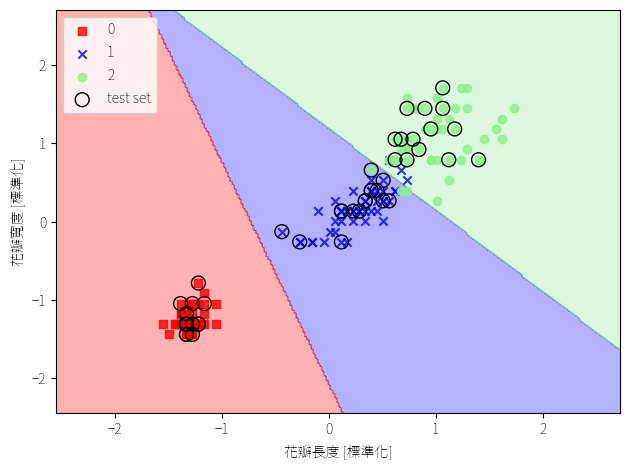

In [17]:
# 從 sklearn 匯入邏輯回歸模型
from sklearn.linear_model import LogisticRegression

# 建立邏輯回歸模型
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(x_train_std, y_train)

# 繪製決策邊界
plot_decision_regions(x_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('花瓣長度 [標準化]')
plt.ylabel('花瓣寬度 [標準化]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

## 預測類別的機率

In [18]:
lr.predict_proba(x_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

### 驗證機率總和為 1

In [19]:
lr.predict_proba(x_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

### 選取機率最高的結果

In [20]:
lr.predict_proba(x_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

### 直接使用模型預測類別

In [21]:
lr.predict(x_test_std[:3, :])

array([2, 0, 0])

# 支持向量機 (Support Vector Machines)

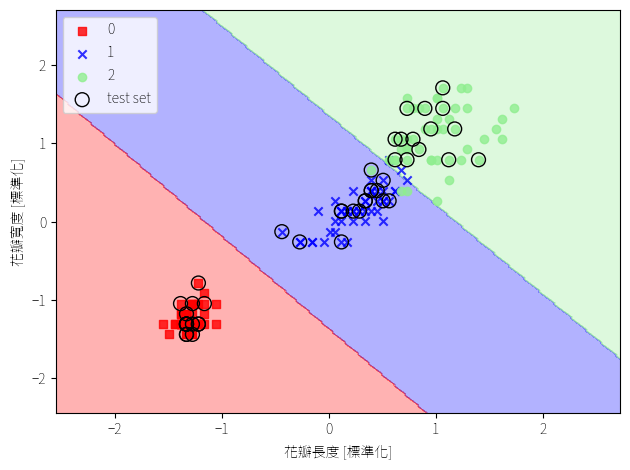

In [22]:
from sklearn.svm import SVC

"""
四種不同SVC分類器:
    LinearSVC (線性)
    kernel='linear' (線性)
    kernel='poly' (非線性)
    kernel='rbf' (非線性)

Parameters:
    C: 限制模型的複雜度，防止過度擬合。
    max_iter: 最大迭代次數，預設1000。
"""
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(x_train_std, y_train)

plot_decision_regions(x_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('花瓣長度 [標準化]')
plt.ylabel('花瓣寬度 [標準化]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

## 使用 SVM 來解決非線性問題

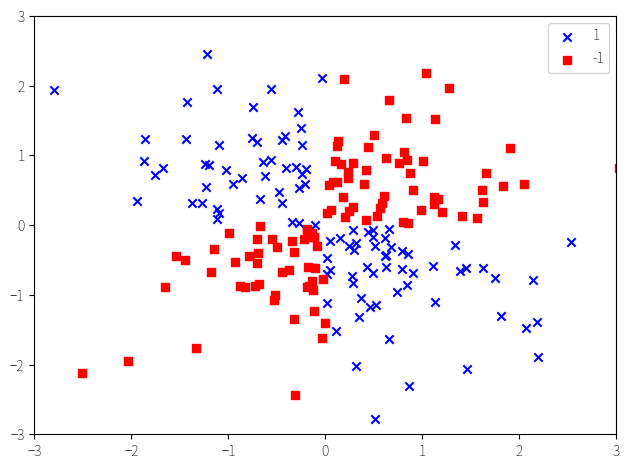

In [23]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()

plt.show()

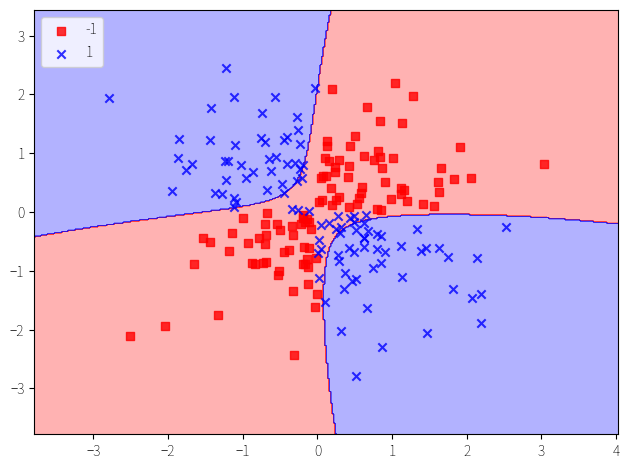

In [24]:
from sklearn.svm import SVC

"""
gamma: 數值越大越能做複雜的分類邊界。
"""
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

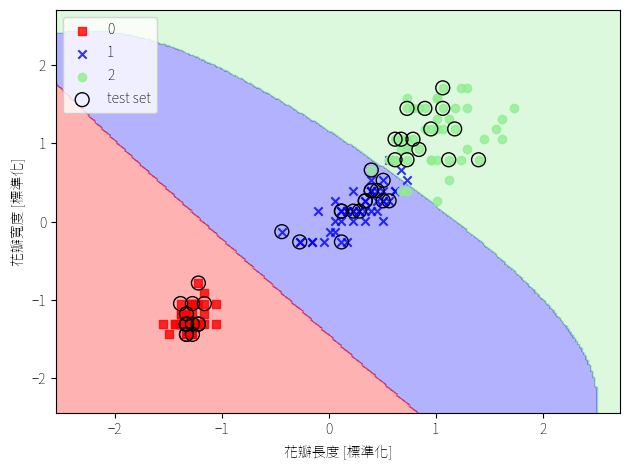

In [25]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(x_train_std, y_train)

plot_decision_regions(x_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('花瓣長度 [標準化]')
plt.ylabel('花瓣寬度 [標準化]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_15.png', dpi=300)
plt.show()

## Gamma 值設定太大

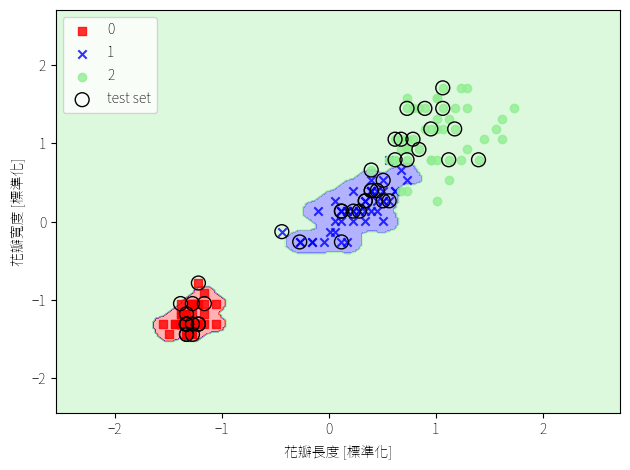

In [26]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(x_train_std, y_train)

plot_decision_regions(x_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('花瓣長度 [標準化]')
plt.ylabel('花瓣寬度 [標準化]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()